# Lab 1.2: Introduction to Radar

In [1]:
%matplotlib widget
import rad.example as ex
import rad.quiz as qz
from rad.const import c, k
from rad.radar import to_db, from_db, deg2rad, rad2deg
from math import sqrt, sin, asin, cos, acos, tan, atan2, pi, log, log10

**Reminders**: 

- Hit the *<font color="DarkBlue">Run All</font>* button <img width="18px" src="img/run_all_icon.png"> button above before continuing
- Useful formulae and definitions are available in [Reference](Reference.ipynb)

Alright, now we can start learning about radar! To begin, we will first start on the basics of ranging.

## Ranging

Many commercial and defense applications rely on the estimation of the location and signature properties of a **target**:
- Airplane in the sky
- Object under the ground
- Submarine in the water
- Person in a building

To interrogate this region, sensing can be done in two different modes: *active* or *passive*. In active sensing, energy is emitted from a controlled source, the targets perturb or scatter the transmitted energy and create an echo; the echo is then received back at the sensor (see figure below). The sensor then will extract target information from the received echo. In contrast, passive sensing relies on an external uncontrolled source of energy---it could even be the target itself. For this course, though, we will only be concerned with active sensing.

<div style="text-align: center"> <img src="img/active.png" justify="center" width="900px"></img> </div>

### Waves and Propagation

For active ranging to work, we need the ability emit a **wave** that travels through space and reach the target. The wave will move at a naturally defined speed called the **propagation velocity**, $v_p$ , that depends on the physical mechanism used to propagate the wave. For instance, in sonar, waves move at the speed of sound in water, i.e., $v_p = 1500~\mathrm{m/s}$, and in radar, waves will move at the speed of light[<sup>1</sup>](#foot_light), i.e., $v_p = 3\times 10^8~\mathrm{m/s}$.

Most ranging systems use sine waves (or variations thereof) as the main wave shape due to their ease in generation and well-understood behavior. In the interactive plot below, we see the transmission of a sine wave at different frequencies and propagation velocities. The pink dot on the left shows the instantaneous value of the transmitted wave and the red line is the actual wave. We can start the transmission using the <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img> button, freeze time using the <font color="DarkBlue">*Pause*</font> <img width="12px" src="img/pause.png"></img> button, and reset the plot using the <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img> button. Additionally, the wave frequency and propagation velocity can be changed using the <font color="DarkBlue">*Frequency*</font> and <font color="DarkBlue">*Propagation Velocity*</font> sliders, respectively. 

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

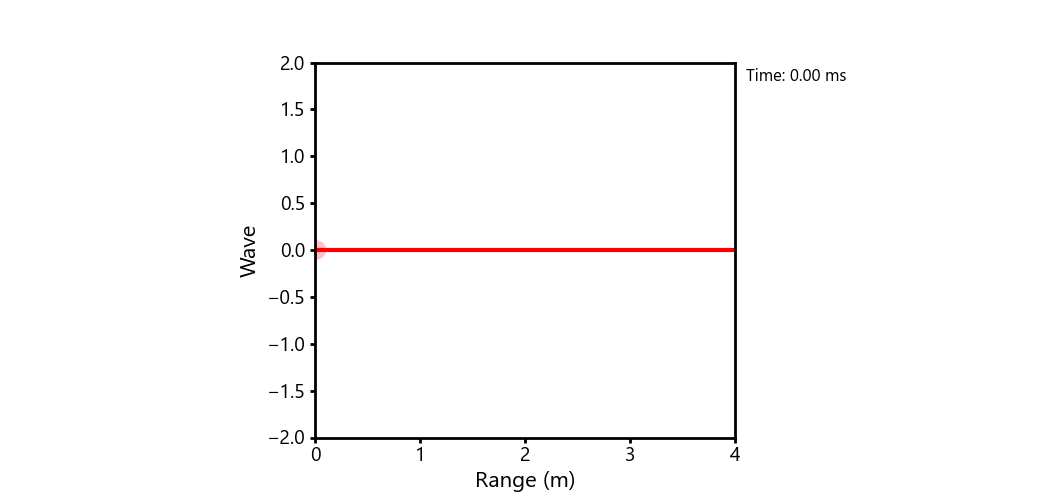

In [2]:
ex.ex_1_2_1()

We can notice that changing the <font color="DarkBlue">*Frequency*</font> only affects how quickly the instantaneous value (i.e., pink dot) moves and altering the <font color="DarkBlue">*Propagation Velocity*</font> affects how quickly the wave moves outward.

***

#### Question 1

Using the <font color="DarkBlue">*Frequency*</font> and <font color="DarkBlue">*Propagation Velocity*</font> sliders and <font color="DarkBlue">*Pause*</font> <img width="12px" src="img/pause.png"></img> button, estimate the wavelength (i.e., distance from peak-to-peak or valley-to-valley) for the following cases:

**(a)** What is the wavelength, $\lambda$ , of a transmitted sine wave with frequency $f = 1000~\mathrm{Hz}$ and propagation velocity $v_p = 1000~\mathrm{m/s}$?

In [3]:
qz.quiz_1_2_1a()

In [4]:
# Scratch space

**(b)** What is the wavelength, $\lambda$ , of a transmitted with frequency $f = 1000~\mathrm{Hz}$ and propagation velocity $v_p = 2000~\mathrm{m/s}$?

In [5]:
qz.quiz_1_2_1b()

In [6]:
# Scratch space

**(c)** What is the wavelength, $\lambda$ , of a transmitted with frequency $f = 500~\mathrm{Hz}$ and propagation velocity $v_p = 1000~\mathrm{m/s}$?

In [7]:
qz.quiz_1_2_1c()

In [8]:
# Scratch space

***

We can see that wavelength, $\lambda$ , is related to both the transmit frequency, $f$ , and the propagation velocity, $v_p$. In fact, it can be summarized by:

$$
\lambda = \frac{v_p}{f}
$$

One way to think about this result is as follows: consider sending one period of a sine wave with period $T$. At time $t = 0$, the beginning of the wave is transmitted. By the definition of the period, the time it takes for the transmitted sine wave to progress through a single period is $T$. At the end of that period at which $t = T$, the front of the wave has travelled outward by a distance of $v_p \cdot T$. We also know that $T = 1/f$, so the distance travelled by the front of the wave after a period, i.e., the wavelength, is $\lambda = v_p \cdot T = v_p \cdot 1/f$.

We can verify this with the interactive plot below. Try seeing how far the front of the wave moves while the instantaneous value (i.e., pink dot) starts and returns to a peak value.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

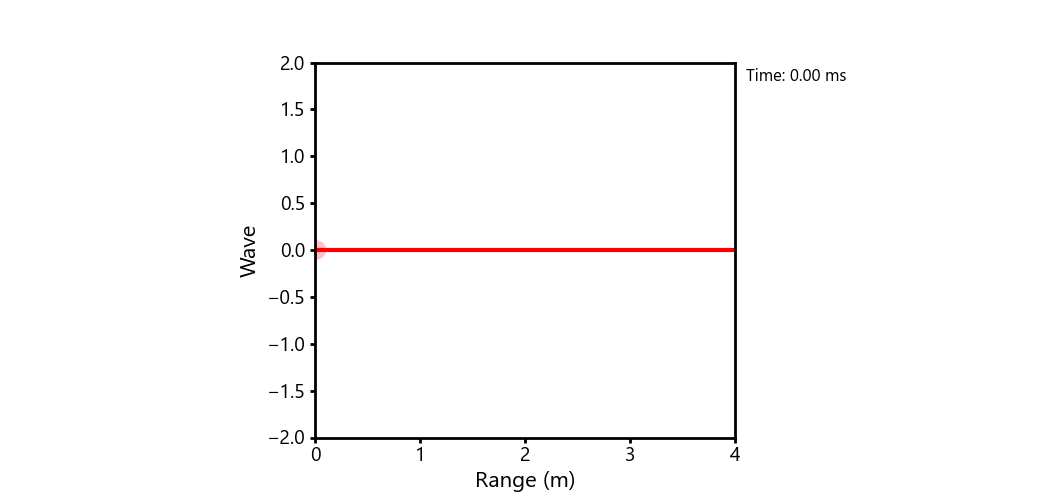

In [9]:
ex.ex_1_2_1()

Note that you can also rearrange the wavelength equation to also get:

$$
f = \frac{v_p}{\lambda}
$$

So, if we know the wavelength and the propagation velocity, we can also calculate the frequency of the transmitted sine wave.

***

#### Question 2

**(a)** In radar ($v_p = 3\times 10^8~\mathrm{m/s}$), what is wavelength, $\lambda$ , of a transmitted sine wave with a frequency $f = 500~\mathrm{MHz}$? 

In [10]:
qz.quiz_1_2_2a()

In [11]:
# Scratch space

**(b)** In sonar ($v_p = 1500~\mathrm{m/s}$), if a transmitted sine wave has a wavelength of $\lambda = 5~\mathrm{m}$, what is the transmit frequency, $f$? 

In [12]:
qz.quiz_1_2_2b()

In [13]:
# Scratch space

***

As the emitted energy travels outward from the sensor, it weakens; this is called **propagation loss**. This is due to the fact that there is a fixed amount of energy in the emission, and it spreads out in space over time. This is the same reason that if you were to throw a rock in a still pond, the ripples on the water get shallower as they move out from where the rock hit the water. 

To illustrate this, the following example shows the transmission of a source producing a time-limited sine wave propagating at $v_p = 1000~\mathrm{m/s}$ and how its strength changes as it emanates. We will be looking from the top down at the sensor on a patch of ground that is $200~\mathrm{km}$ by $200~\mathrm{km}$; the wave plotted is the value at ground level. The amplitude is shown by the transparency of the lines; sine wave peaks are thick lines, sine wave valleys are thin lines.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=100.0, des…

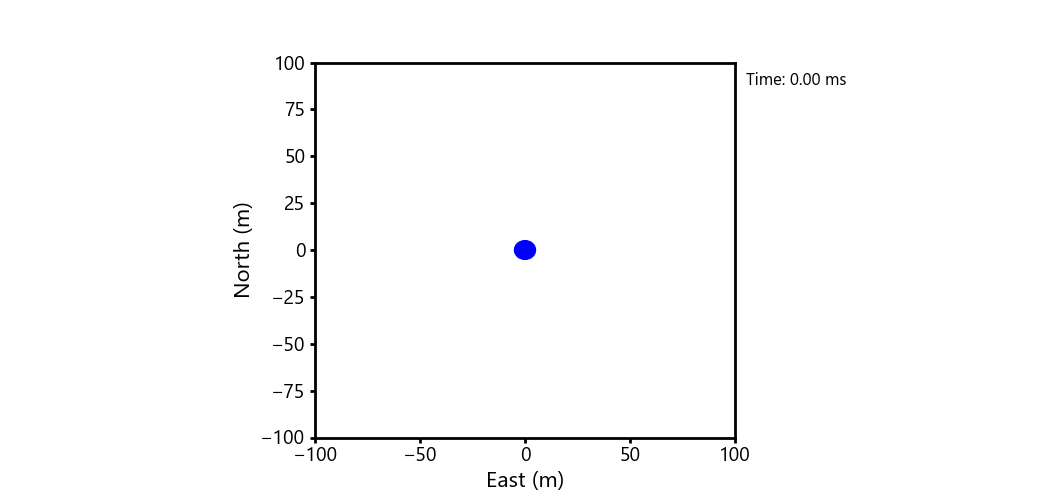

In [14]:
ex.ex_1_2_2()

To garner more intuition, we can also view how the amplitude of a wave evolves along a line of propagation, i.e., along the ground. The interactive plot below shows the perspective of the sine wave as it travels away from the source at propagation velocity of $v_p = 1000~\mathrm{m/s}$. Try changing the *<font color="DarkBlue">Transmit Energy</font>* and *<font color="DarkBlue">Transmit Frequency</font>* to see how the wave changes.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=200.0, d…

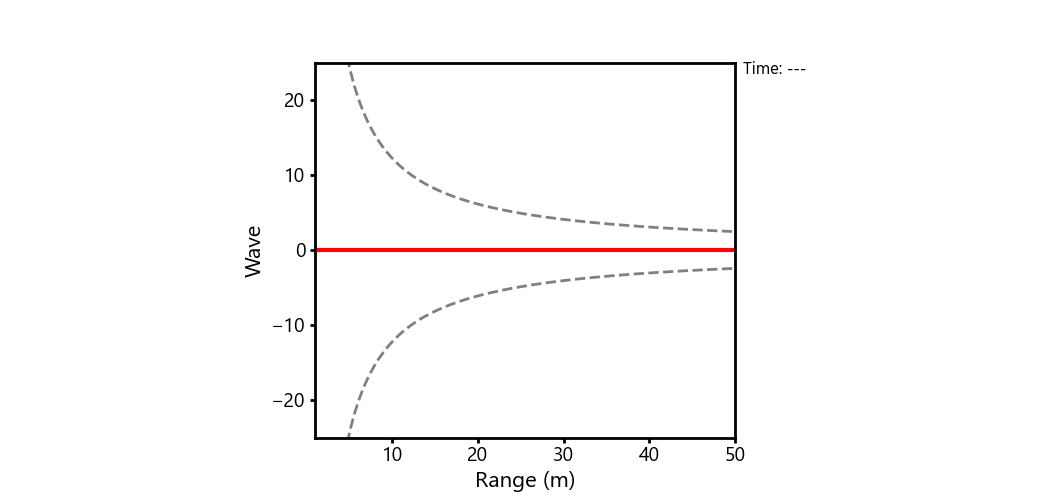

In [15]:
ex.ex_1_2_3()

It is important to note that there are often other factors that may cause propagation loss to be more severe (e.g., absorption in water), making the impulse lose amplitude at a greater rate than shown above. However, for this course, we will only consider the attenuation due to spherical emanation of the wave. A more detailed discussion of propagation loss is in [Lab 2.1: Radar Range Equation](2_1_Radar_Range_Equation.ipynb).

### Undirected Ranging

First, we will discuss undirected ranging sensors; this means a **pulse** (i.e., time-limited wave) of energy will be sent in all directions equally, and echoes from all targets will be received back at the sensor. For the sake of presentation, we will begin by considering a sensor that can produce an **impulse**, i.e., an extremely short and energetic pulse. (Practically, impulses are extremely difficult to generate, but they are a good way to introduce the basics of ranging.)

In the interactive plot below, we can see the transmitted impulse in **<font color="blue">blue</font>** and echo in **<font color="red">red</font>**; you can use the <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img> button to transmit the impulse, and the <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img> button to reset. To scrub through the scene, you can click on the <font color="DarkBlue">*Frame*</font> slider and use the left and right arrow keys to move it one step at a time. You can also adjust the location of the target using the <font color="DarkBlue">*East*</font> and <font color="DarkBlue">*North*</font> sliders. The propagation velocity for this example is $v_p = 1000~\mathrm{m/s}$.

**Note:** Once we press <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img>, we cannot change any parameters until we reset with <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img>.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Target</b>"), FloatSlider(value=50.0, desc…

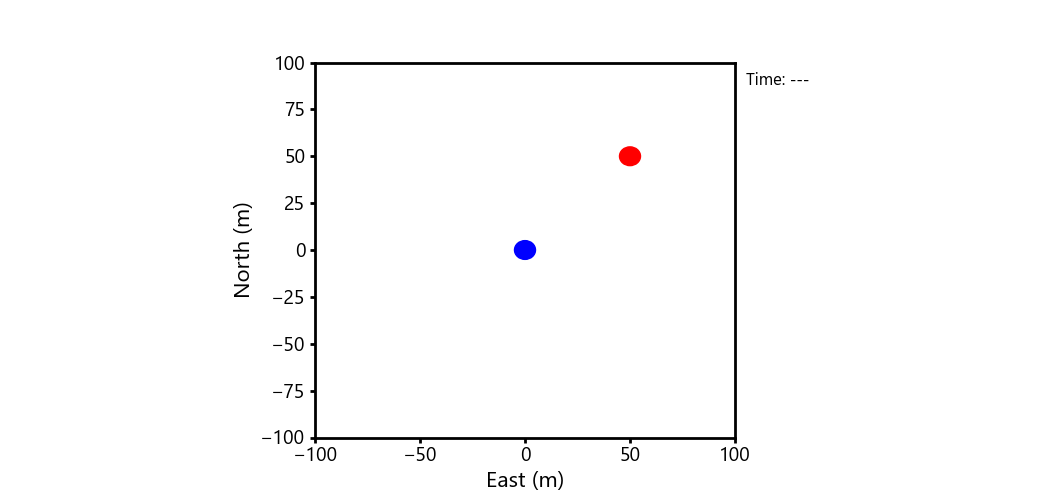

In [16]:
ex.ex_1_2_4()

You may have also noticed that when an echo is received back at the sensor, the sensor will temporarily turn **<font style="bold" color="orange">orange</font>**. This known as a **detection**--an acknowledgement that an echo has been received. We will discuss detections and how they are made in [Lab 3.2: Detection](3_2_Detection.ipynb).

***

#### Question 3

Using the interactive plot above to estimate some times of interest (Hint: Use the *Frame* slider). For a target at $75~\mathrm{m}$ East, $80~\mathrm{m}$ North:

**(a)** What is the time that the transmitted pulse reaches the target (i.e., center of target circle)?

In [17]:
qz.quiz_1_2_3a()

In [18]:
# Scratch space

**(b)** What is the time that the echo reaches the sensor (i.e., center of sensor circle)?

In [19]:
qz.quiz_1_2_3b()

In [20]:
# Scratch space

***

In typical ranging applications, we *cannot* measure the time that the pulse hits the target, but we *can* measure when the echo comes back to the sensor. The time between transmission of the impulse and the reception of the echo is called the **propagation delay**, $\tau$. (For this course, we will only be concerned with the two-way propagation delay (to and from the target); in some applications, e.g., wireless communications, one-way propagation is a key quantity of interest.)

Thus, to measure range, the sensor will measure the propagation delay from the transmission of the impulse to the reception of its echo. The range from the sensor, $r$ , is related to the propagation delay, $\tau$ , and propagation velocity, $v_p$ , by: 

$$\tau = \frac{2r}{v_p}$$

The factor of two comes from the fact that the transmitted pulse travels the range to the target, and then the echo travels the same distance back.

<div style="text-align: center"> <img src="img/prop_delay.png" justify="center" width="800px"></img> </div>

For the target in Question 4, we can calculate the exact time that the echo should hit the sensor by:
$$
\begin{align*}
\tau &= \frac{2r}{v_p}\\
&= \frac{2 \cdot \sqrt{75^2 + 80^2}}{1000}\\
&= 219.3~\mathrm{ms}
\end{align*}
$$
where we used the fact that the range is calculated by $r = \sqrt{x^2 + y^2}$.

Rearranging terms, we can also solve for the range if we know the propagation delay as:

$$
r = \frac{v_p \tau}{2}
$$

***

#### Question 4

**(a)** What is the propagation delay, $\tau$ , to and from a target at a range $r = 1000~\mathrm{km}$ from a radar? (Propagation velocity for radar is $v_p = 3 \times 10^8~\mathrm{m/s}$)

In [21]:
qz.quiz_1_2_4a()

In [22]:
# Scratch space

**(b)** If the propagation delay for a radar return is $5.7~\mathrm{ms}$, what is the range to the target?

In [23]:
qz.quiz_1_2_4b()

In [24]:
# Scratch space

#### Question 5

Now, let us take one more step toward a real ranging system. In the interactive plot below, there is a hidden target, and the echo is no longer plotted. Also, there is a *<font color="DarkBlue">Detections</font>* box to keep track of any detected echoes and their time of reception. The propagation velocity is $v_p=1000~\mathrm{m/s}$.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Output</b>"), Select(description='Detectio…

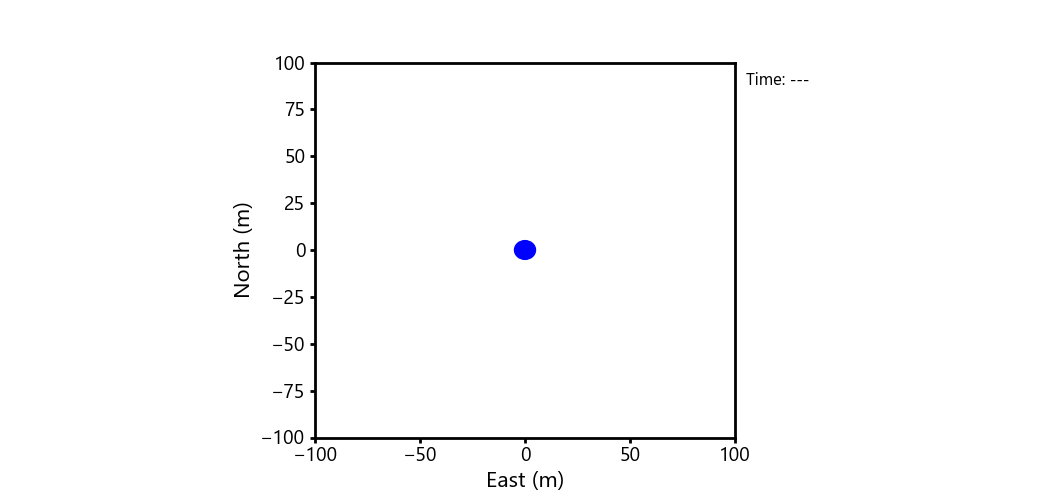

In [25]:
ex.ex_1_2_5()

What is the range of the hidden target (in meters)?

In [26]:
qz.quiz_1_2_5()

In [27]:
# Scratch space

***

So, from the last example, we know that by the finding the presence of echoes, we can locate the range of a hidden target. However, we still do not know *which direction* it is relative to the radar. To figure that out, we have to use **directed ranging**.  

### Directed Ranging

There are two main forms of directed ranging:

- **Directed on transmit**: Transmitted energy is focused into a certain direction, so if an echo is received, you know the direction from which it originated
- **Directed on receive**: Only certain directions are listened for echoes, so if an echo is received, you know the direction from which it originated

These methods can be used separately but are most often used together. Note that it is not typically useful in ranging applications to transmit your energy in one region on transmit and listen to a different region for echoes on receive; for this course, we will assume that if you are using both methods, then their directions are identical.

To describe direction, we will use **azimuth** as defined in the picture below. It ranges from 0° (North), 90° (East), 180° (South), 270° (West), to 360° (North).

<div style="text-align: center"> <img src="img/azimuth.png" justify="center" width="350px"></img> </div>

To begin, we will take a look at directed ranging on transmit. To see how this works, let us revisit the first example of this lab. In the interactive plot below, you will now notice a few things:

- The transmitted pulse is now focused to only a certain span of direction
- New *<font color="DarkBlue">Transmit Azimuth</font>* and *<font color="DarkBlue">Transmit Beamwidth</font>* sliders allow you to choose which direction and swath of angle to send a pulse
- An echo is only created when the target is hit with the focused energy

**Note:** Once we press <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img>, we cannot change any parameters until we reset with <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img>.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=0.0, descr…

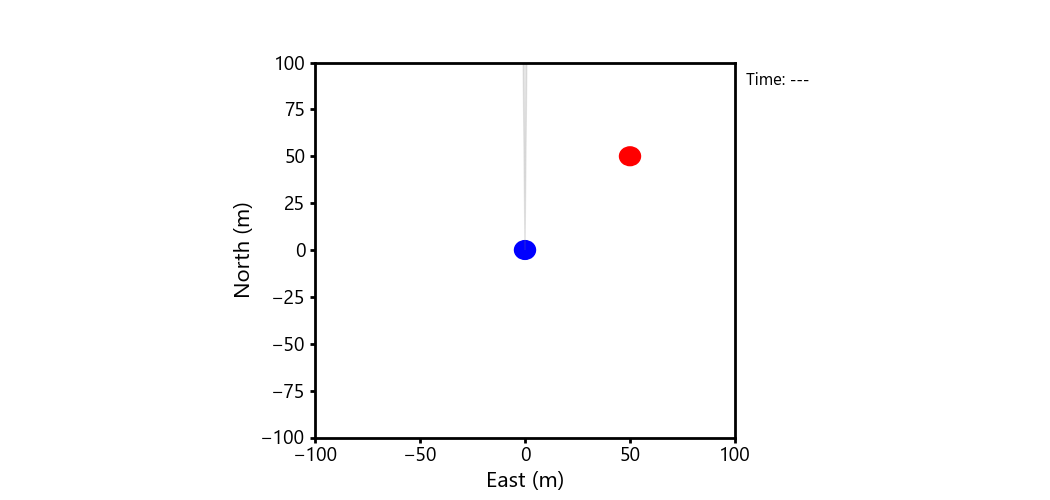

In [28]:
ex.ex_1_2_6()

As mentioned above, focusing energy around a certain direction creates a **beam**—just in the same way that the focused light from a flashlight is called a beam. One important property of a beam is called the **beamwidth**, which is the angular extent of the beam. The smaller the beamwidth, the narrower the energy becomes focused in space. If we denote the direction of interrogation as $\theta$ (defined using as an azimuth angle), then we will denote the beamwidth as $\Delta \theta$. In the following question, we will see how forming a beam can be used to localize a target in a certain direction.

***

#### Question 6

In the scene below, there is a hidden target. Find its position in terms of range and azimuth using directed ranging on transmit. The propagation velocity is $v_p = 1000~\mathrm{m/s}$.

**Note:** Once we press <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img>, we cannot change any parameters until we reset with <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img>.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=0.0, descr…

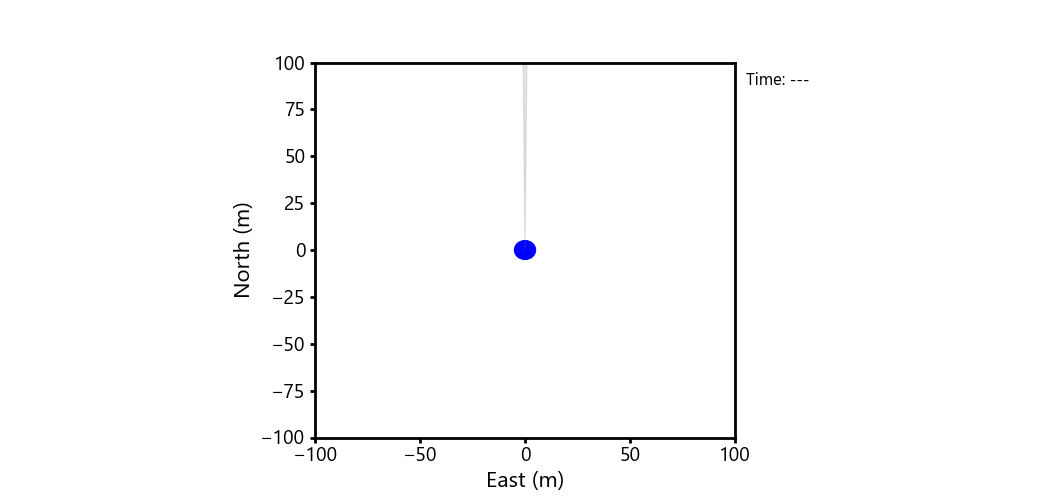

In [29]:
ex.ex_1_2_7()

**(a)** What is the range of the target?

In [30]:
qz.quiz_1_2_6a()

In [31]:
# Scratch space

**(b)** What is the azimuth of the target?

In [32]:
qz.quiz_1_2_6b()

In [33]:
# Scratch space

***

From Question 6, you can note an interest tradeoff starting to appear: 
- A *wider* beam makes it easier to get a detection with fewer transmissions, but it has higher uncertainty in the direction of the target
- A *smaller* beam requires more transmissions to find the target, yet it gives lower uncertainty of the direction of the target

The beamwidth can also affect the strength of transmitted energy into a region of space; we will discuss that in following labs.

For directed ranging on receive, we have a different example. Now, in the interactive plot, the azimuth changes the region in space that is listened to for echoes. You will notice that the detection (i.e., sensor turns **<font color="orange">orange</font>** when hit by echo) only happens when the target is in the receive beam of the sensor.

**Note:** Once we press <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img>, we cannot change any parameters until we reset with <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img>.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=0.0, descr…

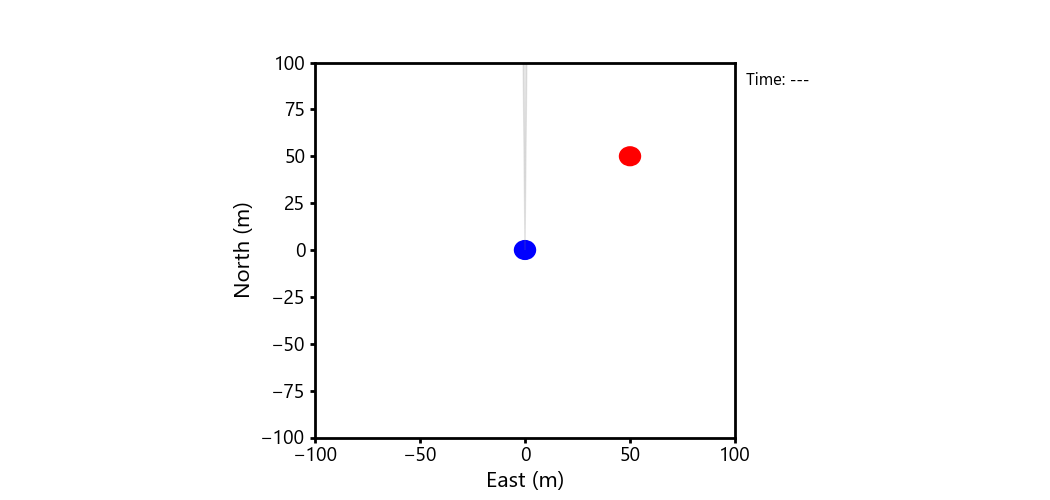

In [34]:
ex.ex_1_2_8()

***

#### Question 7

In the following, use directed ranging on receive to locate a hidden target in range and azimuth. The propagation velocity is $v_p = 1000~\mathrm{m/s}$.

**Note:** Once we press <font color="DarkBlue">*Play*</font> <img width="12px" src="img/play.png"></img>, we cannot change any parameters until we reset with <font color="DarkBlue">*Stop*</font> <img width="12px" src="img/stop.png"></img>.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=0.0, descr…

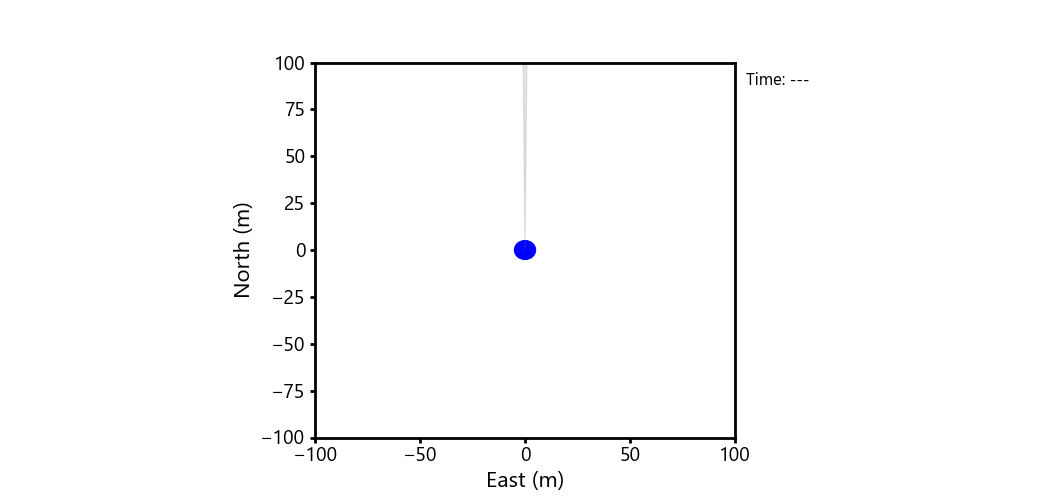

In [35]:
ex.ex_1_2_9()

**(a)** What is the range of the target?

In [36]:
qz.quiz_1_2_7a()

In [37]:
# Scratch space

**(b)** What is the azimuth of the target?

In [38]:
qz.quiz_1_2_7b()

In [39]:
# Scratch space

***

While finding the target in Question 7, we can notice that the same beamwidth tradeoff shows up as in directed on transmit: a wider beam makes it easier to detect the presence of a target but makes the direction more uncertain.

Up until now, we have looked at undirected ranging for finding the range of targets and directed ranging for estimating both the range and direction of targets. A good question to answer now is: *how does a sensor perform directed ranging*? Directed ranging uses two key steps for concentrating energy into a particular region in angle:

- **Focusing**: Narrowing of emission to desired swath in angle
- **Steering**: Choosing direction of transmission

<div style="text-align: center"> <img src="img/focus_steer.png" justify="center" width="500px"></img> </div>

In the following sections, we will discuss how focusing and steering are typically done.

### Focusing

For most ranging applications, focusing is done by creating an **aperture**, i.e., a surface in which identical transmissions/receptions are made. Apertures can be made in two different fashions:

 - Reflect the wave off of a shaping device, such as a parabolic dish
 - Populate the chosen surface with discrete emitters that can be operated in concert; this is called an **array**, each emitter is called an **element** of the array

The figure below shows two common figurations used to create apertures. On the left is a parabolic reflector, whose shape is chosen to align all of the waves emanating from a source and create a uniform transmission surface. On the right is an example of an array, which uses multiple sources to fill the same surface and create a coordinated transmission.

<div style="text-align: center"> <img src="img/aperture.png" justify="center" width="475px"></img> </div>

It may seem counterintuitive at first, but *<font color="BlueViolet">as the aperture gets larger, the more focused the energy becomes</font>*. For a concrete example, it can be shown<sup>[[1]](#ref_orfanidis)</sup> that using a circular aperture (like a dish) of diameter $D$ at transmit wavelength $\lambda$, the beamwidth $\Delta\theta$ (in degrees) is going to be bounded by

$$
\Delta\theta \geq 70^\circ\frac{\lambda}{D}
$$

For instance, if we were using a dish radar with diameter $D = 5~\mathrm{m}$ and transmitting at a wavelength of $\lambda = 0.33~\mathrm{m}$, then

$$
\begin{align}
\Delta\theta &\geq 70^\circ\frac{0.33}{5}\nonumber\\
&= 4.62^\circ
\end{align}
$$

**Note:** As beamwidths for actual systems are designed to get close to this bound, we will use this formula throughout the course as an approximation to the true beamwidth of a circular aperture. 

To get a smaller beam, you would either have to transmit at a higher frequency (i.e., shorter wavelength) or increase the size of the dish. This result can be extended to non-circular apertures also. In general, the lower bound on beamwidth of any aperture will be of the form

$$
\Delta\theta \geq \mathrm{Shape~Factor}~\cdot\frac{\lambda}{D}
$$

where the shape factor depends on the specific aperture shape, and $D$ is the extent of the aperture in the considered dimension. Thus, to *narrow the beamwidth* of any sensor, we can:

- Increase transmit frequency, $f$ (i.e., shorten wavelength, $\lambda$)
- Increase aperture extent, $D$

It is important to note that even though we have discussed the process of focusing in the context of transmission, the same principles apply for reception. For example, the receive beamwidth will also be dictated in the same by the wavelength and size of the receive aperture. 

***

#### Question 8

**(a)** What is the minimum beamwidth of a circular aperture of with diameter $D = 3.8~\mathrm{m}$ operating at a wavelength of $\lambda = 0.12~\mathrm{m}$?

In [40]:
qz.quiz_1_2_8a()

In [41]:
# Scratch space

**(b)** What is the smallest diameter possible to obtain a $1^\circ$ beamwidth when operating at transmit frequency $f =10~\mathrm{GHz}$ with a propagation velocity of $v_p = 3 \times 10^8~\mathrm{m/s}$?

In [42]:
qz.quiz_1_2_8b()

In [43]:
# Scratch space

***

### Gain

Concentrating energy into a focused beam not only allows you to get more certain angle information from target echoes, it also allows you to sense objects further in range. This is due to the propagation loss incurred as the waves travel through space; from before, we know that the further the wave travels, its amplitude weakens. By squeezing the transmitted energy into a beam, you are increasing the initial strength of the wave in the beam, allowing it to travel further without getting too weak. This concept is known as the **transmit gain**, $G_t(\theta)$, of an aperture: the ratio of the transmitted energy[<sup>2</sup>](#foot_gain) in a direction versus the energy input into the aperture:

$$
G_t(\theta) = \frac{\mathrm{Transmitted~Energy~in~Direction~}\theta}{\mathrm{Input~Energy}}
$$

Below is an interactive figure showing the gain pattern of a dish radar (i.e., circular aperture) with variable *<font color="DarkBlue">Dish Radius</font>* and *<font color="DarkBlue">Transmit Frequency</font>*. Try changing the radius and frequency and see how each impact the pattern. 

interactive(children=(FloatSlider(value=1.0, description='Dish Radius (m)', max=30.0, min=0.1, style=SliderSty…

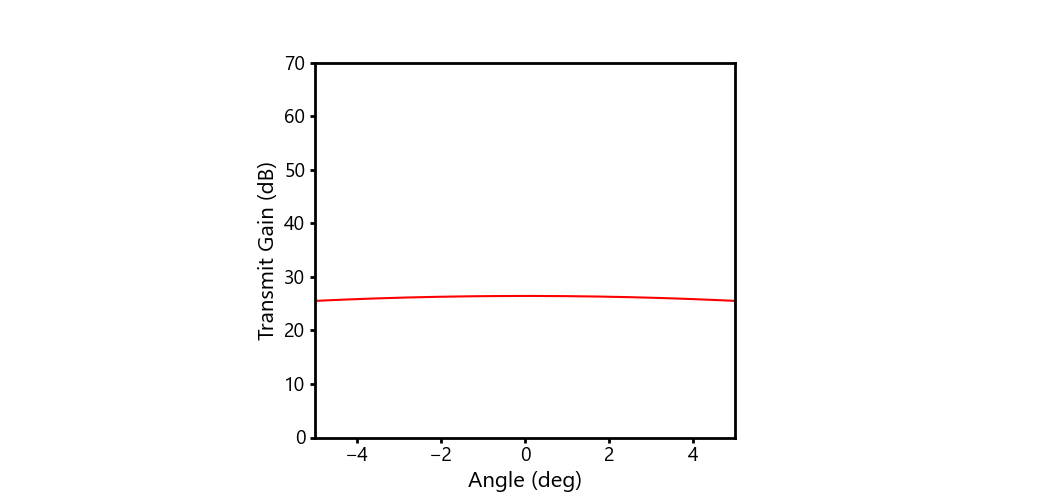

In [44]:
ex.ex_1_2_10()

We can notice that there is not a perfect "beam", but the plot exhibits a primary region in the middle which has the highest gain. This is because any aperture of finite size cannot actually focus all energy perfectly into a beam; there will always be a little amount of energy transmitted outside of the desired region. The central portion of the pattern with the peak gain is called the **mainlobe** of the pattern; the other outlying lobes are called **sidelobes**. We will discuss these more in later labs.

By varying the dish radius and transmit frequency, we have noticed that the energy becomes more concentrated and the maximum gain increases with: (i) increasing radius, and (ii) increasing frequency. In fact, it can be shown that the maximum gain at the center of the beam can be shown to be bounded by:

$$ G_t(\theta) \leq \frac{4\pi A_t}{\lambda^2} $$

where $A_t$ is the area of the transmit aperture. Thus, the maximum gain can be raised by:

- Increasing aperture area, $A$
- Increasing transmit frequency, $f$ (i.e., shortening wavelength, $\lambda$)

Note that the same results can be applied to the receive gain, $G_r(\theta)$, defined as:

$$
G_r(\theta) = \frac{\mathrm{Received~Energy}}{\mathrm{Incident~Energy~in~Direction~}\theta}
$$

Thus, the receive gain: (i) can also be increased by increasing aperture area, increasing frequency, and (ii) can be upper bounded by

$$ G_r(\theta) \leq \frac{4\pi A_r}{\lambda^2} $$

For systems that use the same aperture for transmission and reception, the transmit gain, $G_t(\theta)$, and receive gain, $G_r(\theta)$, will be very similar.

**Note:** Just as with the beamwidth bound, actual systems are designed to get as close as possible to the gain bound, and, thus, we will use
$$
G = \frac{4\pi A}{\lambda^2}
$$
as an approximation for true gain values throughout the course.

***

#### Question 9

If the propagation velocity is $v_p = 2000~\mathrm{m/s}$, what is the maximum transmit gain of a rectangular aperture of height $h = 2.1~\mathrm{m}$ and width $w = 3.3~\mathrm{m}$, operating at frequency $f = 15~\mathrm{kHz}$? (Note that the answer is asked for in $\mathrm{dB}$, which is the typical form used to represent gain.)

In [45]:
qz.quiz_1_2_9()

In [46]:
# Scratch space

***

### Steering

We now have determined how to focus energy in space using an aperture. Now, the next step in directed ranging is to choose which direction to emit the energy; this step is called steering. The most straightforward method of steering is called **mechanical steering**, which simply uses a gimbal to move the aperture around and point at the desired direction. This is commonly done for reflector-type apertures like parabolic dishes. Mechanical steering can be quite slow depending on the size and weight of the sensing apparatus. For instance, large radar systems can weigh up to 10 tons, making it very difficult to move the direction of transmission quickly. Below is a picture of the Haystack<sup>[[2]](#ref_haystack)</sup> radar system and its elaborate pedestal used for movement.

<div style="text-align: center"> <img src="img/haystack.jpg" justify="center" width="375px"></img> </div>

For arrays, there is another type of steering that can be much faster than mechanical called **electronic steering**. It is called *electronic* because it uses electronic components to slightly change the transmission from each element in order to steer the signal. The most intuitive form of electronic steering is called **delay steering**, which follows this main premise: *<font color="BlueViolet">delay the transmission of each element in the array appropriately so they all hit the target at the same time</font>*.

The following interactive example shows how delay steering looks for an array with $7$ elements, spaced $4~\mathrm{m}$ apart. Try changing the transmit azimuth and see how the energy concentrates at different angles. You will notice that the strongest (i.e., darkest) echo occurs when the all of the impulses hit the target at the same time.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=0.0, descr…

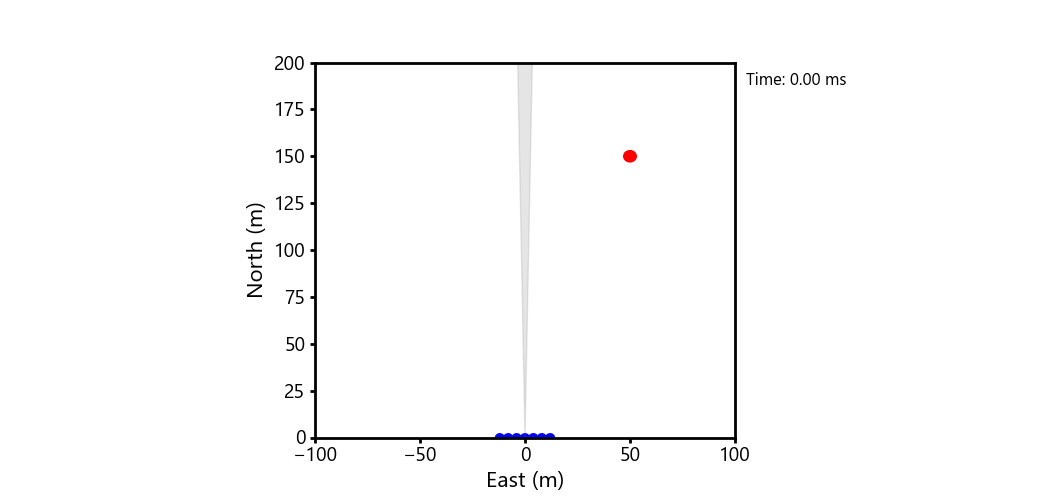

In [47]:
ex.ex_1_2_11()

The mathematics behind delay steering (and its commonly-used variant called **phase steering**) will be discussed more in [Lab 3.1: Radar Transmissions and Receptions](3_1_Radar_Transmissions_and_Receptions.ipynb).

### Target Motion

In the discussions above, we have only considered slow-moving or stationary targets. If a target it moving with respect to the sensor, it can alter the characteristics of the transmitted pulse when reflecting it back. This is commonly known as the **Doppler effect**. In the interactive example below, we can see how the **range rate** of the target (speed at which the target moves directly toward/away from the sensor) causes the reflected wave to change. Try varying the *<font color="DarkBlue">Initial Range</font>*, *<font color="DarkBlue">Range Rate</font>*, and *<font color="DarkBlue">Transmit Frequency</font>* sliders to see the difference from the transmitted wave to the received echo. For this example, the propagation velocity is $v_p = 1000~\mathrm{m/s}$.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=50.0…

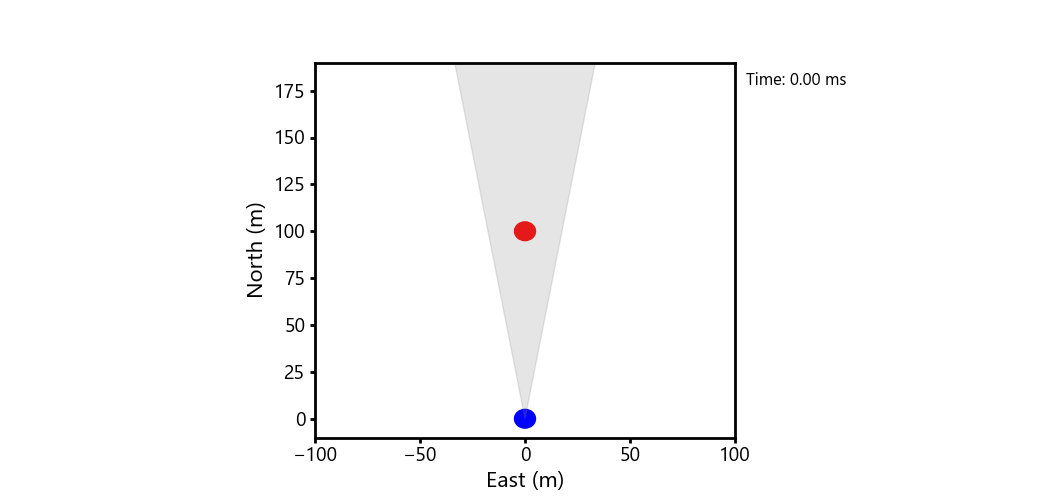

In [48]:
ex.ex_1_2_12()

We can notice that as the target moves faster toward the sensor, the wave is compressed, which increases its frequency; when the target is moving away from the sensor, the wave dilates, lowering the frequency. We will discuss the Doppler effect in detail and how we can use it to measurement target velocity in [Lab 4.1: Target Parameter Estimation](4_1_Target_Parameter_Estimation.ipynb). For the next few labs, however, we will focus on slowly-moving targets, as it makes concepts much easier to introduce.

Up until now, we have discussed concepts that will apply to most ranging methods:

- Waves and propagation
- Estimating target range from propagation delay
- Directed ranging for estimation of target angle
- Focusing transmitted and received energy using apertures
- Steering transmitted and received energy using mechanical or electronic methods
- Target motion can alter the transmitted wave through compression/dilation

Now, it is time to narrow our scope down to a specific type of ranging system: **radar**.

## Radar

Radar is short for *radio detection and ranging*; the "radio" implies that it uses electromagnetic waves in the radio frequency portion of the electromagnetic spectrum to perform ranging. This tells us a couple of the special properties of radar versus other ranging mechanisms:

- Propagation velocity is the speed of light[<sup>1</sup>](#foot_light), $v_p = 3\times 10^8~\mathrm{m/s}$
- Radars typically operate at frequencies from $10~\mathrm{MHz}$ to $300~\mathrm{GHz}$; equivalent to transmit wavelengths from $30~\mathrm{m}$ down to $1~\mathrm{mm}$

We now revisit the very first interactive plot from this lab that shows the propagation of a wave into space; now, however, we use the speed of light as the propagation velocity. This can give you a rough picture of a transmission emanating from a radar. Notice that the timestamp is now in nanoseconds ($\mathrm{ns}$).

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatLogSlider(value=10.0,…

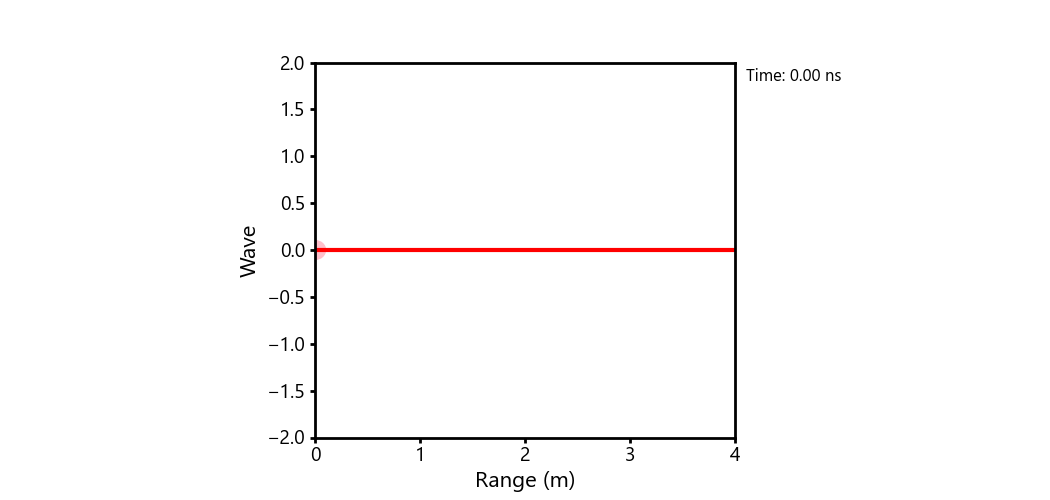

In [49]:
ex.ex_1_2_13()

Some bands of frequency are so commonly used that they have special names. for instance, here are some prevalent ones for radar systems:

- L-band: $1-2~\mathrm{GHz}$
- S-band: $2-4~\mathrm{GHz}$
- C-band: $4-8~\mathrm{GHz}$
- X-band: $8-12~\mathrm{GHz}$

<div style="text-align: center"> <img src="img/bands.png" justify="center" width="600px"></img> </div>

Another special property of electromagnetic waves are that they are **transverse**, meaning the direction of variation is perpendicular to the direction of travel; this is often easier to explain graphically. Below is an animation of a radar transmission in three dimensions. You will notice that the wave varies up and down as it travels outward, similar to making waves on a taut rope.

<div style="text-align: center"> <img src="img/vert.gif" justify="center" width="500px"></img> </div>

The orientation of the wave with respect to the direction of travel is called its **polarization**; the polarization shown in the animation is called **vertical polarization** as the wave varies up and down as it propagates. We will discussion polarization in more detail in [Lab 3.1: Radar Transmissions and Receptions](Lab_3_1_Radar_Transmissions_and_Receptions.ipynb).

### Basic Radar Structure

A basic radar system consists of five main components:

- **Transmitter**: Dictates how and where energy is to be emitted
- **Antenna**: Emits electromagnetic energy into space, converts electromagnetic energy into received signals
- **Receiver**: Chooses how and where to listen for target echoes
- **Detection**: Finds target detections, estimates target attributes
- **Tracking**: Organizes detections into target tracks, estimates target motion

<div style="text-align: center"> <img src="img/radar_sys1.png" justify="center" width="700px"></img> </div>

We will dive more into transmitters, antennas, and receivers in the [Lab 3.1: Radar Transmissions and Receptions](Lab_3_1_Radar_Transmissions_and_Receptions.ipynb), and the latter half of the course will focus on detection in [Lab 3.2: Detection](Lab_3_2_Detection.ipynb) and tracking in [Lab 4.2: Target Tracking](Lab_3_1_Target_Tracking.ipynb).

### Missions

Radars often have multiple objectives to accomplish. Here are some of the most frequently used:

- **Search**: Persistent surveillance of region for detection of target presence
- **Track**: Following a detected target, taking further measurements, and estimating target motion
- **Discrimination**: Analyzing target signature information to classify type

This course will focus on the *search* and *track* missions; as we will see throughout the course, each of these missions will influence radar design differently. When building a radar system, these constraints have to be balanced with each other and the construction cost.

Now, to wrap things up, let us look at applying some of the general ranging concepts discussed in this lab to a notional radar system.

***

#### Question 10

For a dish radar with a circular aperture of diameter $D = 4.4~\mathrm{m}$, transmitting at $f = 5~\mathrm{GHz}$:

**(a)** What is the transmit wavelength?

In [50]:
qz.quiz_1_2_10a()

In [51]:
# Scratch space

**(b)** What is the narrowest beamwidth possible for this system?

In [52]:
qz.quiz_1_2_10b()

In [53]:
# Scratch space

**(c)** What is the maximum transmit gain possible for this system?

In [54]:
qz.quiz_1_2_10c()

In [55]:
# Scratch space

***

 ## Summary

In this lab, we introduced the basics of ranging that are common to many applications:

- Waves and propagation
- Estimating target range from propagation delay
- Directed ranging for estimation of target angle
- Focusing transmitted and received energy using apertures
- Steering transmitted and received energy using mechanical or electronic methods

After discussing fundamental ranging, we then narrowed our focus to radar, which uses transmissions of electromagnetic energy in radio frequency bands to perform ranging. Aspects unique to using electromagnetic waves are:

- Electromagnetic waves propagate at the speed of light, $v_p = 3\times 10^8~\mathrm{m/s}$
- Electromagnetic waves are transverse, i.e., have a polarization

A radar system will typically consist of a transmitter, antennas, receiver, a detector, and a tracker.

## Footnotes

<a id="foot_light"><sup>1</sup></a>The speed of light in the Earth's atmosphere is actually slightly slower than $3 \times 10^8~\mathrm{m/s}$, but we will use this value throughout the course since it is easy to remember.

<a id="foot_gain"><sup>2</sup></a>Gain is also commonly defined as the ratio of transmitted power in a direction to the inputted power. This definition is more useful for the study of constant-power (i.e., infinite duration) signals. The definition using energy is chosen for the course as radar signals (with some notable exceptions) are typically short in duration.

## References

<a id="ref_orfanidis">[1]</a> S. Orfanidis, *Electromagnetic Waves and Antennas*, 2016.

<a id="ref_haystack">[2]</a> *MIT Haystack Observatory* https://www.haystack.mit.edu/